## eiahig


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns 

In [2]:
from platform import python_version
print(python_version())

3.8.2


In [3]:
import lasio

In [4]:
las1=lasio.read(r"C:\Users\Aman Kumar\Desktop\IW-1_S3_R4_UBI-GR-OBMI-MSIP-PPC_Main _Relabeled_003PUC.las")
las2=lasio.read(r"C:\Users\Aman Kumar\Desktop\IW-1_S2_R1_AIT-APS-LDS-LDT-HNGS_Main.las")

In [5]:
df1=las1.df()
df2=las2.df()

In [6]:
#for count,curve in enumerate(las1.curves):
    # print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit},\t Description:{curve.descr}")

In [7]:
print(las1.curves)

Mnemonic   Unit  Value  Description                                        
--------   ----  -----  -----------                                        
DEPT       M            DEPTH (BOREHOLE) {F10.4}                           
CDF        N            Calibrated Downhole Force {F13.4}                  
DTCO       US/F         Delta-T Compressional {F13.4}                      
DTCO3      US/F         Compressional Slowness from Measurement 3 {F13.4}  
DTSH5      US/F         Shear Slowness from Measurement 5 {F13.4}          
DTSH6      US/F         Shear Slowness from Measurement 6 {F13.4}          
DTSM       US/F         Delta-T Shear {F13.4}                              
HD1_PPC1   IN           PPC1 Hole Diameter 1 {F13.4}                       
HD2_PPC1   IN           PPC1 Hole Diameter 2 {F13.4}                       
SPHI       V/V          Sonic Porosity {F13.4}                             
TENS:1     LBF          Cable Tension {F13.4}                              
ANOR       M

In [8]:
print(las2.curves)

Mnemonic  Unit  Value  Description                                                       
--------  ----  -----  -----------                                                       
DEPT      M            DEPTH (BOREHOLE) {F10.4}                                          
AF10      OHMM         Array Induction Four Foot Resistivity A10 {F13.4}                 
AF20      OHMM         Array Induction Four Foot Resistivity A20 {F13.4}                 
AF30      OHMM         Array Induction Four Foot Resistivity A30 {F13.4}                 
AF60      OHMM         Array Induction Four Foot Resistivity A60 {F13.4}                 
AF90      OHMM         Array Induction Four Foot Resistivity A90 {F13.4}                 
ANOR      M/S2         Acceleration Computed Norm {F13.4}                                
AO10      OHMM         Array Induction One Foot Resistivity A10 {F13.4}                  
AO20      OHMM         Array Induction One Foot Resistivity A20 {F13.4}                  
AO30      

In [9]:
df1.reset_index(inplace=True)
df1.rename(columns={'DEPT':'DEPTH'},inplace=True)

In [10]:
df2.reset_index(inplace=True)
df2.rename(columns={'DEPT':'DEPTH'},inplace=True)            

In [11]:
data1=df1[df1['DEPTH']>=4133.7] [df1['DEPTH']<=4239.7] #Brewester Member
data2=df2[df2['DEPTH']>=4133.7] [df2['DEPTH']<=4239.72]

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\1680967077.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1=df1[df1['DEPTH']>=4133.7] [df1['DEPTH']<=4239.7] #Brewester Member
C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\1680967077.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2=df2[df2['DEPTH']>=4133.7] [df2['DEPTH']<=4239.72]


## plot basic and quality control

In [89]:
dt=data1['DTCO3']
ds=data1['DTSM']
p=304800/dt
s=304800/ds

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\2505072426.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



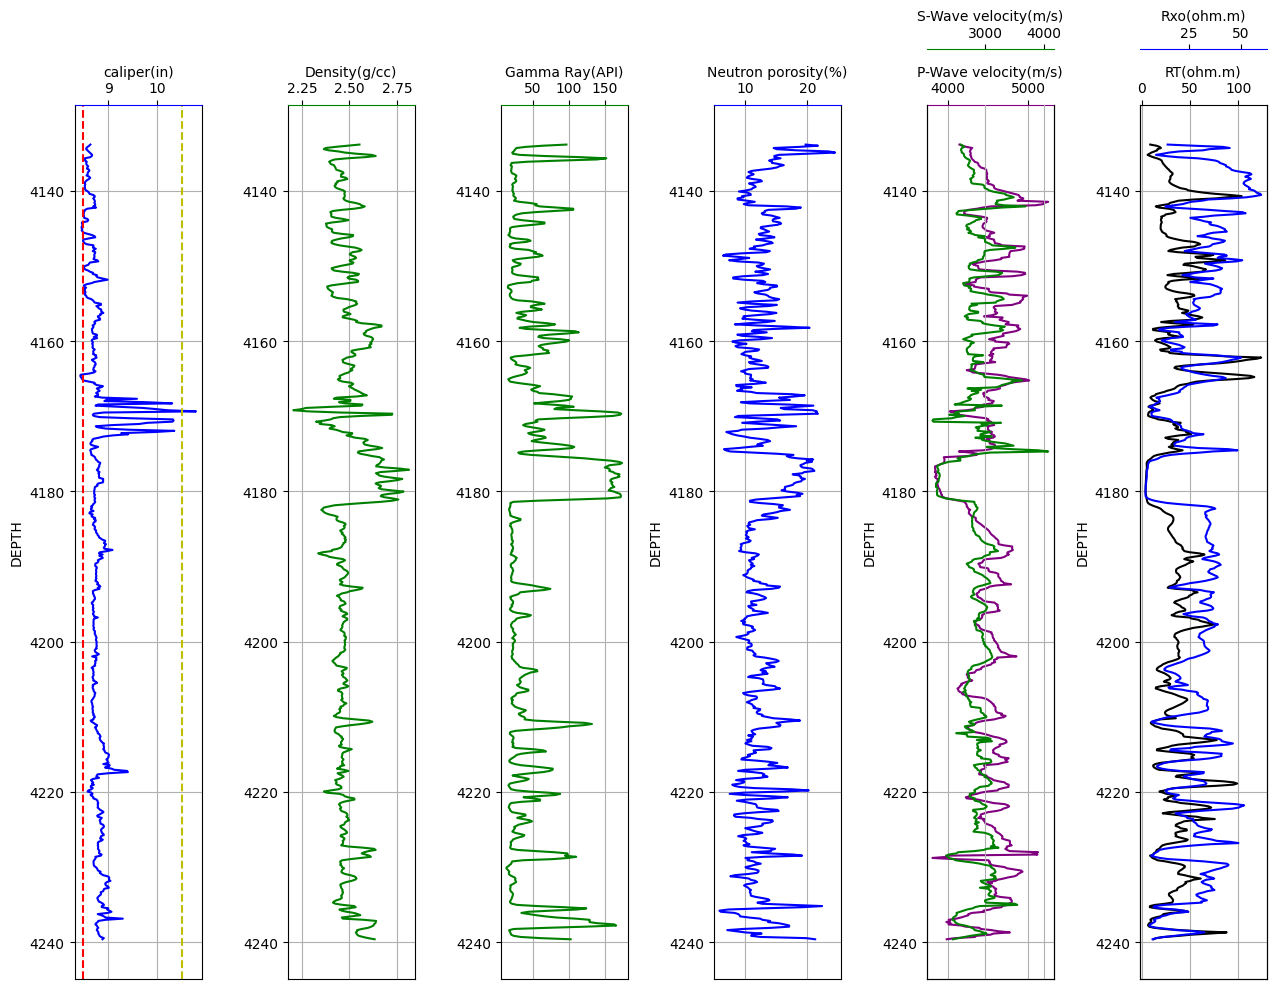

In [95]:
fig,axes=plt.subplots(figsize=(15,10))
ax1=plt.subplot2grid((1,7),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,7),(0,1),rowspan=1,colspan=1)
ax3=plt.subplot2grid((1,7),(0,2),rowspan=1,colspan=1)
ax4=plt.subplot2grid((1,7),(0,3),rowspan=1,colspan=1)
ax5=plt.subplot2grid((1,7),(0,4),rowspan=1,colspan=1)
ax7=plt.subplot2grid((1,7),(0,5),rowspan=1,colspan=1)

ax6=ax5.twiny()
ax8=ax7.twiny()

ax1.plot("CALI","DEPTH",data=data2,color='blue')
ax1.invert_yaxis()
ax1.axvline(x=8.5,c='r',ls='--')
ax1.axvline(x=10.5,c='y',ls='--')
ax1.set_ylabel('DEPTH')
ax1.set_xlabel('caliper(in)')
ax1.spines['top'].set_edgecolor('blue')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position("top")
ax1.grid()


ax2.plot("RHOB","DEPTH",data=data2,color='green')
ax2.invert_yaxis()
ax2.set_ylabel('DEPTH',visible=False)
ax2.set_xlabel('Density(g/cc)')
ax2.spines['top'].set_edgecolor('green')
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position("top")
ax2.grid()


ax3.plot("GR","DEPTH",data=data1,color='green')
ax3.invert_yaxis()
ax3.set_ylabel('DEPTH',visible=False)
ax3.set_xlabel('Gamma Ray(API)')
ax3.spines['top'].set_edgecolor('green')
ax3.xaxis.set_ticks_position('top')
ax3.xaxis.set_label_position("top")
ax3.grid()

ax4.plot(data2.APSC*100,"DEPTH",data=data2,color='blue')
ax4.invert_yaxis()
ax4.set_ylabel('DEPTH')
ax4.set_xlabel('Neutron porosity(%)')
ax4.spines['top'].set_edgecolor('blue')
ax4.xaxis.set_ticks_position("top")
ax4.xaxis.set_label_position("top")
ax4.grid()

ax5.plot(p,"DEPTH",data=data1,color='purple')
ax5.invert_yaxis()
ax5.set_ylabel('DEPTH')
ax5.set_xlabel('P-Wave velocity(m/s)')
ax5.spines['top'].set_edgecolor('purple')
ax5.spines["top"].set_position(("outward", 0))
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.grid()

ax6.plot(s,"DEPTH",data=data1,color='green')
ax6.set_ylabel('DEPTH')
ax6.set_xlabel('S-Wave velocity(m/s)')
ax6.spines['top'].set_edgecolor('green')
ax6.xaxis.set_ticks_position("top")
ax6.xaxis.set_label_position("top")
ax6.spines["top"].set_position(("outward", 40))
ax6.grid()



ax7.plot("ATRT","DEPTH",data=data2,color='black')
ax7.invert_yaxis()
ax7.semilogx
ax7.set_ylabel('DEPTH')
ax7.set_xlabel('RT(ohm.m)')
ax7.spines['top'].set_edgecolor('black')
ax7.spines["top"].set_position(("outward", 0))
ax7.xaxis.set_ticks_position("top")
ax7.xaxis.set_label_position("top")
ax7.grid()



ax8.plot("ATRX","DEPTH",data=data2,color='blue')
ax8.semilogx
ax8.xaxis.set_ticks_position("top")
ax8.xaxis.set_label_position("top")
ax8.set_ylabel('DEPTH')
ax8.set_xlabel('Rxo(ohm.m)')
ax8.spines['top'].set_edgecolor('blue')
ax8.spines["top"].set_position(("outward", 40))

plt.tight_layout()

## mark outlier

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\3871346098.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



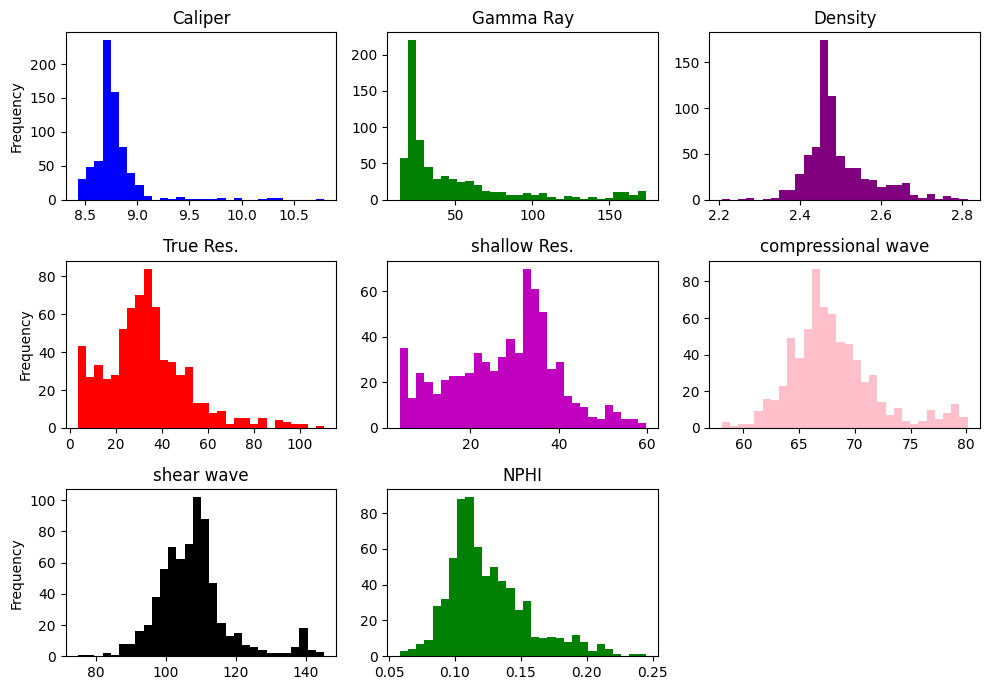

In [97]:
fig,axes=plt.subplots(figsize=(10,7))
ax1=plt.subplot2grid((3,3),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((3,3),(0,1),rowspan=1,colspan=1)
ax3=plt.subplot2grid((3,3),(0,2),rowspan=1,colspan=1)
ax4=plt.subplot2grid((3,3),(1,0),rowspan=1,colspan=1)
ax5=plt.subplot2grid((3,3),(1,1),rowspan=1,colspan=1)
ax6=plt.subplot2grid((3,3),(1,2),rowspan=1,colspan=1)
ax7=plt.subplot2grid((3,3),(2,0),rowspan=1,colspan=1)
ax8=plt.subplot2grid((3,3),(2,1),rowspan=1,colspan=1)

ax1.hist(data2.CALI,color='blue',bins=30)
ax1.set_ylabel('Frequency')
ax1.set_title('Caliper')

ax2.hist(data1.GR,color='green',bins=30)
ax2.set_title('Gamma Ray')

ax3.hist(data2.RHOB,color='purple',bins=30)
ax3.set_title('Density')

ax4.hist(data2.RT,color='red',bins=30)
ax4.set_ylabel('Frequency')
ax4.set_title('True Res.')

ax5.hist(data2.ATRX,color='m',bins=30)
ax5.set_title('shallow Res.')

ax6.hist(data1.DTCO3,color='pink',bins=30)
ax6.set_title('compressional wave')

ax7.hist(data1.DTSM,color='k',bins=30)
ax7.set_ylabel('Frequency')
ax7.set_title('shear wave')

ax8.hist(data2.APSC,color='green',bins=30)
ax8.set_title('NPHI')

plt.tight_layout()

## calculate volume of shale and total porosity

In [12]:
p15 = data1['GR'].quantile(0.05)
p195 = data1['GR'].quantile(0.95)
Igr=(data1['GR']-p15)/(p195-p15) #volume of shale
V_sh=1.7-(3.38-(Igr+0.7)**2)**(1/2)
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\1556941991.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



Text(0.5, 1.0, 'Gamma Ray(API)')

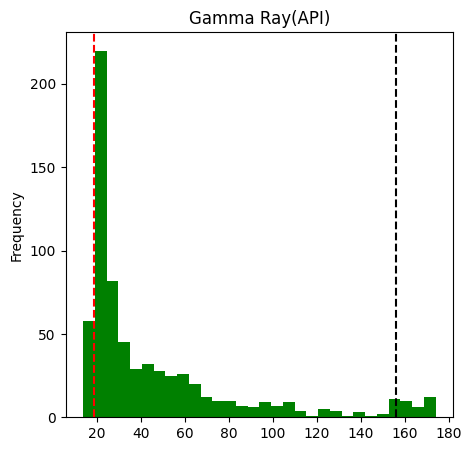

In [102]:
fig,axes=plt.subplots(figsize=(5,5))
ax1=plt.subplot2grid((1,1),(0,0))
ax1.hist(data1.GR,color='green',bins=30)
ax1.axvline(p15,c='r',ls='--')
ax1.axvline(p195,c='k',ls='--')
ax1.set_ylabel('Frequency')
ax1.set_title('Gamma Ray(API)')


In [13]:
pfl=1.01 # fluid density
dphi=data2['DPHI']
nphi=data2['APSC']
phi_t=(dphi+nphi)/2
phi_t

229    0.12885
230    0.13150
231    0.10295
232    0.10155
233    0.10460
        ...   
919    0.17600
920    0.17070
921    0.17660
922    0.17230
923    0.14455
Length: 695, dtype: float64

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\36516410.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



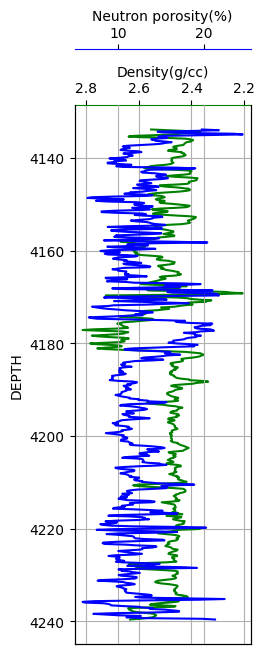

In [103]:
fig,axes=plt.subplots(figsize=(5,7))
ax1=plt.subplot2grid((1,2),(0,0))

ax2=ax1.twiny()

ax1.plot("RHOB","DEPTH",data=data2,color='green')
ax1.invert_xaxis()
ax1.invert_yaxis()

ax1.set_ylabel('DEPTH')
ax1.set_xlabel('Density(g/cc)')
ax1.spines['top'].set_edgecolor('green')
ax1.spines["top"].set_position(("outward", 0))
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
ax1.grid()

ax2.plot(data2.APSC*100,"DEPTH",data=data2,color='blue')
ax2.set_ylabel('DEPTH')
ax2.set_xlabel('Neutron porosity(%)')

ax2.spines['top'].set_edgecolor('blue')
ax2.spines["top"].set_position(("outward", 40))
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")
ax2.grid()

## 3. mark the zone of high porosity

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\3269561258.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



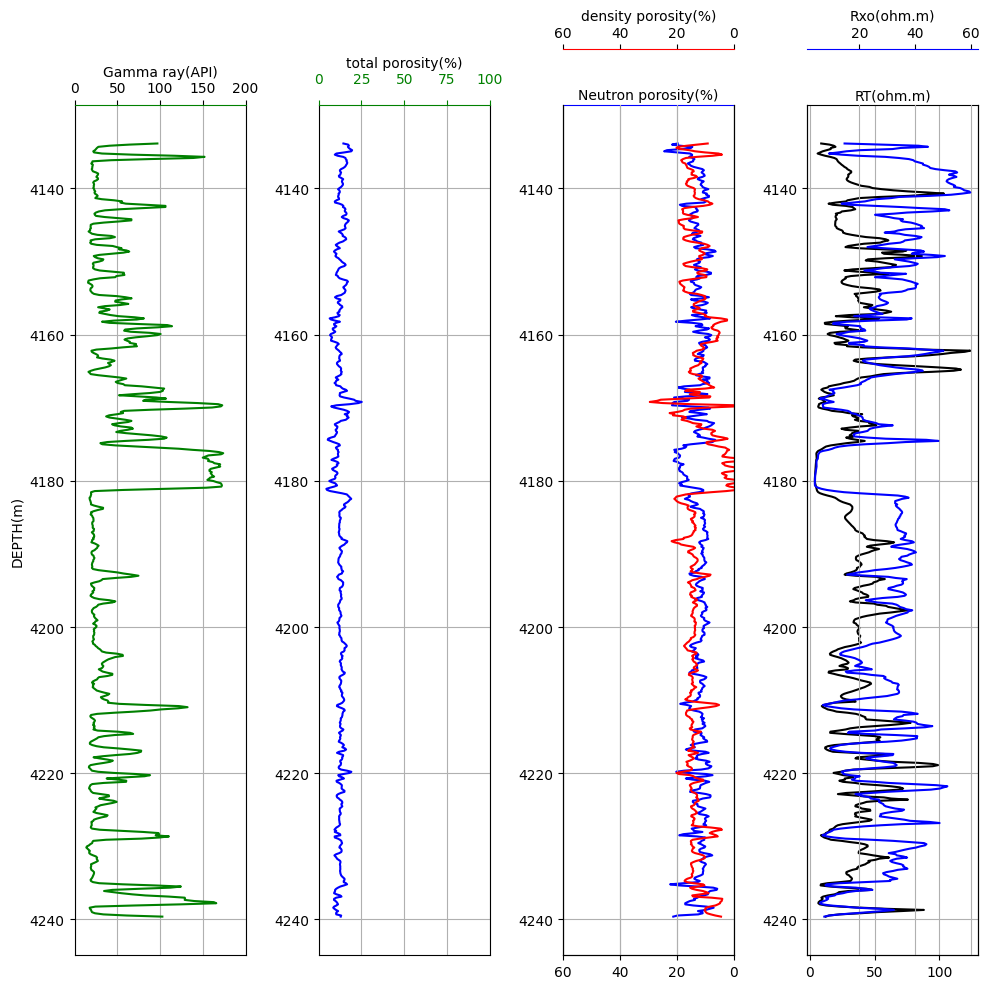

In [116]:
fig,axes=plt.subplots(figsize=(10,10))
ax1=plt.subplot2grid((1,4),(0,0),rowspan=1,colspan=1)
ax1.plot("GR","DEPTH",data=data1,color='green')
ax1.invert_yaxis()
ax1.set_xlim(0,200)
ax1.set_ylabel('DEPTH(m)')
ax1.set_xlabel('Gamma ray(API)')
ax1.spines['top'].set_edgecolor('green')
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position("top")
ax1.grid()

ax2=plt.subplot2grid((1,4),(0,1),rowspan=1,colspan=1)
ax2.plot(phi_t*100,"DEPTH",data=data1,color='blue')
ax2.invert_yaxis()
ax2.set_xlim(0,100)
ax2.set_ylabel('DEPTH',visible=False)
ax2.set_xlabel('total porosity(%)')
ax2.spines['top'].set_edgecolor('green')
ax2.tick_params(axis='x', colors= 'green',pad=10)
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position("top")
ax2.grid()

ax3=plt.subplot2grid((1,4),(0,2),rowspan=1,colspan=1)
ax3.plot(data2.APSC*100,"DEPTH",data=data2,color='blue')
ax3.set_xlim(0,60)
ax3.invert_xaxis()
ax3.invert_yaxis()
ax3.set_ylabel('DEPTH',visible=False)
ax3.set_xlabel('Neutron porosity(%)')
ax3.spines['top'].set_edgecolor('blue')
ax3.spines["top"].set_position(("outward", 0))
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.grid()

ax4=ax3.twiny()               
ax4.plot(data2.DPHI*100,"DEPTH",data=data2,color='red')

ax4.set_xlim(0,60)
ax4.invert_xaxis()
ax4.set_ylabel('DEPTH(m)')
ax4.set_xlabel('density porosity(%)')
ax4.spines['top'].set_edgecolor('red')
ax4.xaxis.set_ticks_position('top')
ax4.xaxis.set_label_position("top")
ax4.spines["top"].set_position(("outward", 40))
ax4.grid()

ax5=plt.subplot2grid((1,4),(0,3),rowspan=1,colspan=1)
ax5.plot("ATRT","DEPTH",data=data2,color='black')
ax5.invert_yaxis()
ax5.semilogx
ax5.set_ylabel('DEPTH',visible=False)
ax5.set_xlabel('RT(ohm.m)')
ax5.spines['top'].set_edgecolor('black')
ax5.spines["top"].set_position(("outward", 0))
ax5.xaxis.set_ticks_position("top")
ax5.xaxis.set_label_position("top")
ax5.grid()


ax6=ax5.twiny()
ax6.plot("ATRX","DEPTH",data=data2,color='blue')
ax6.semilogx
ax6.xaxis.set_ticks_position("top")
ax6.xaxis.set_label_position("top")
ax6.set_ylabel('DEPTH',visible=False)
ax6.set_xlabel('Rxo(ohm.m)')
ax6.spines['top'].set_edgecolor('blue')
ax6.spines["top"].set_position(("outward", 40))


ax6.grid()
plt.tight_layout()

In [16]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [17]:
#fig=go.Figure(data=go.Scatter(x=data1['GR'],y=data1['DEPTH']))
#fig.show()

In [18]:
#fig=px.line(df1,x='DEPTH',y='GR',range_x=[4133,4239],range_y=[0,200])
#fig.show()
#fig.update_xaxes(rangeslider_visible=True)

## creating log plots with make _subplots()

In [19]:
#fig=make_subplots()
#fig=make_subplots(rows=1,cols=3,shared_yaxes=True)
#fig.add_trace(go.Scatter(x=data2['DEPTH'],y=data2['RT']),row=1,col=1)
##
#fig.add_trace(go.Scatter(x=data2['ATRX'],y=data2['DEPTH']),row=1,col=1)
#fig.update_xaxes(title_text='res',row=1,col=1)
#fig.update_yaxes(title_text='DEPTH',row=1,col=1,autorange='reversed')

#fig.show()

In [20]:
#from plotly.subplots import make_subplots

#fig = make_subplots(rows=1, cols=2)

#fig.add_trace(go.Scatter(y=[4, 2, 1], mode="lines"), row=1, col=1)
#fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

#fig.show()

In [21]:
#px.scatter(data2,x='RHOB',y='APSC',color=data1['GR'])

In [22]:
#px.scatter(data2,x='RHOB',y='APSC',color=data1['GR'],marginal_x='histogram')

In [23]:
#fig=px.scatter(x=data2['APSC'],y=phi_t,color=data1['GR'])
#fig.update_xaxes(title_text='NPHI',row=1,col=1)
#fig.update_yaxes(title_text='porosity',row=1,col=1)
#fig.show()

## plot velocity depth profile (compressional ans shear) colour coded

In [ ]:
dt=data1['DTCO3']
ds=data1['DTSM']
p=304800/dt
s=304800/ds
#fig=px.scatter(x=p,y=data1['DEPTH'],color=V_sh,height=800,width=400)
#fig.update_layout(xaxis_title='Compressional',yaxis_title='Depth')
#fig.show()
#fig1=plt.scatter(x=p,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=150)
#plt.scatter(logs.NPHI, logs.RHOB, c = logs.GR, marker='o', s=100, edgecolors='w', cmap='jet', vmin=0, vmax=150)
#plt.colorbar()
#plt.show()

In [25]:
#fig=px.scatter(x=s,y=data1['DEPTH'],color=V_sh,height=800,width=400)
#fig.update_layout(xaxis_title='Shear',yaxis_title='Depth')
#fig.show()

## color coded with volume of shale

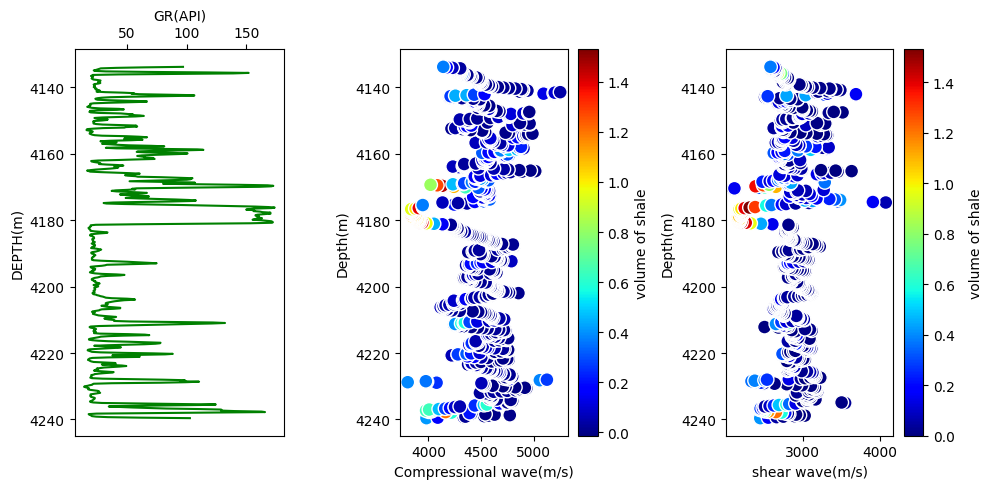

In [107]:
a=V_sh.min()
b=V_sh.max()
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(data1.GR,data1.DEPTH,color='green')
plt.xlabel('GR(API)');plt.ylabel('DEPTH(m)')
plt.gca().invert_yaxis()
ax1=plt.gca()
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
    
plt.subplot(1,3,2)
plt.scatter(x=p,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=min(V_sh),vmax=max(V_sh),alpha=1)
plt.xlabel('Compressional wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('volume of shale')

plt.subplot(1,3,3)
plt.scatter(x=s,y=data1['DEPTH'],c=V_sh,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=b,alpha=1)
plt.xlabel('shear wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('volume of shale',labelpad=10)

plt.tight_layout()

## color coded with porosity

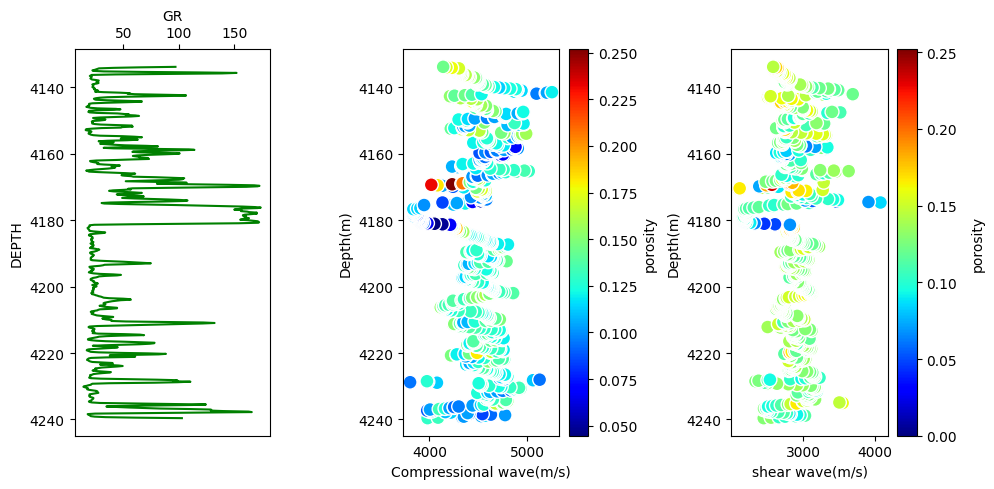

In [104]:
a=phi_t.min()
b=phi_t.max()
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(data1.GR,data1.DEPTH,color='green')
plt.xlabel('GR');plt.ylabel('DEPTH')
plt.gca().invert_yaxis()
ax1=plt.gca()
ax1.xaxis.set_ticks_position("top")
ax1.xaxis.set_label_position("top")
    
plt.subplot(1,3,2)
plt.scatter(x=p,y=data1['DEPTH'],c=phi_t,marker='o',s=100,edgecolors='w',cmap='jet',vmin=a,vmax=b,alpha=1)
plt.xlabel('Compressional wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('porosity')

plt.subplot(1,3,3)
plt.scatter(x=s,y=data1['DEPTH'],c=phi_t,marker='o',s=100,edgecolors='w',cmap='jet',vmin=0,vmax=b,alpha=1)
plt.xlabel('shear wave(m/s)');plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('porosity',labelpad=10)

plt.tight_layout()

## calculate Rw by observation of log

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\722690488.py:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\722690488.py:12: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.

C:\Users\Aman Kumar\AppData\Local\Temp\ipykernel_2700\722690488.py:21: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.



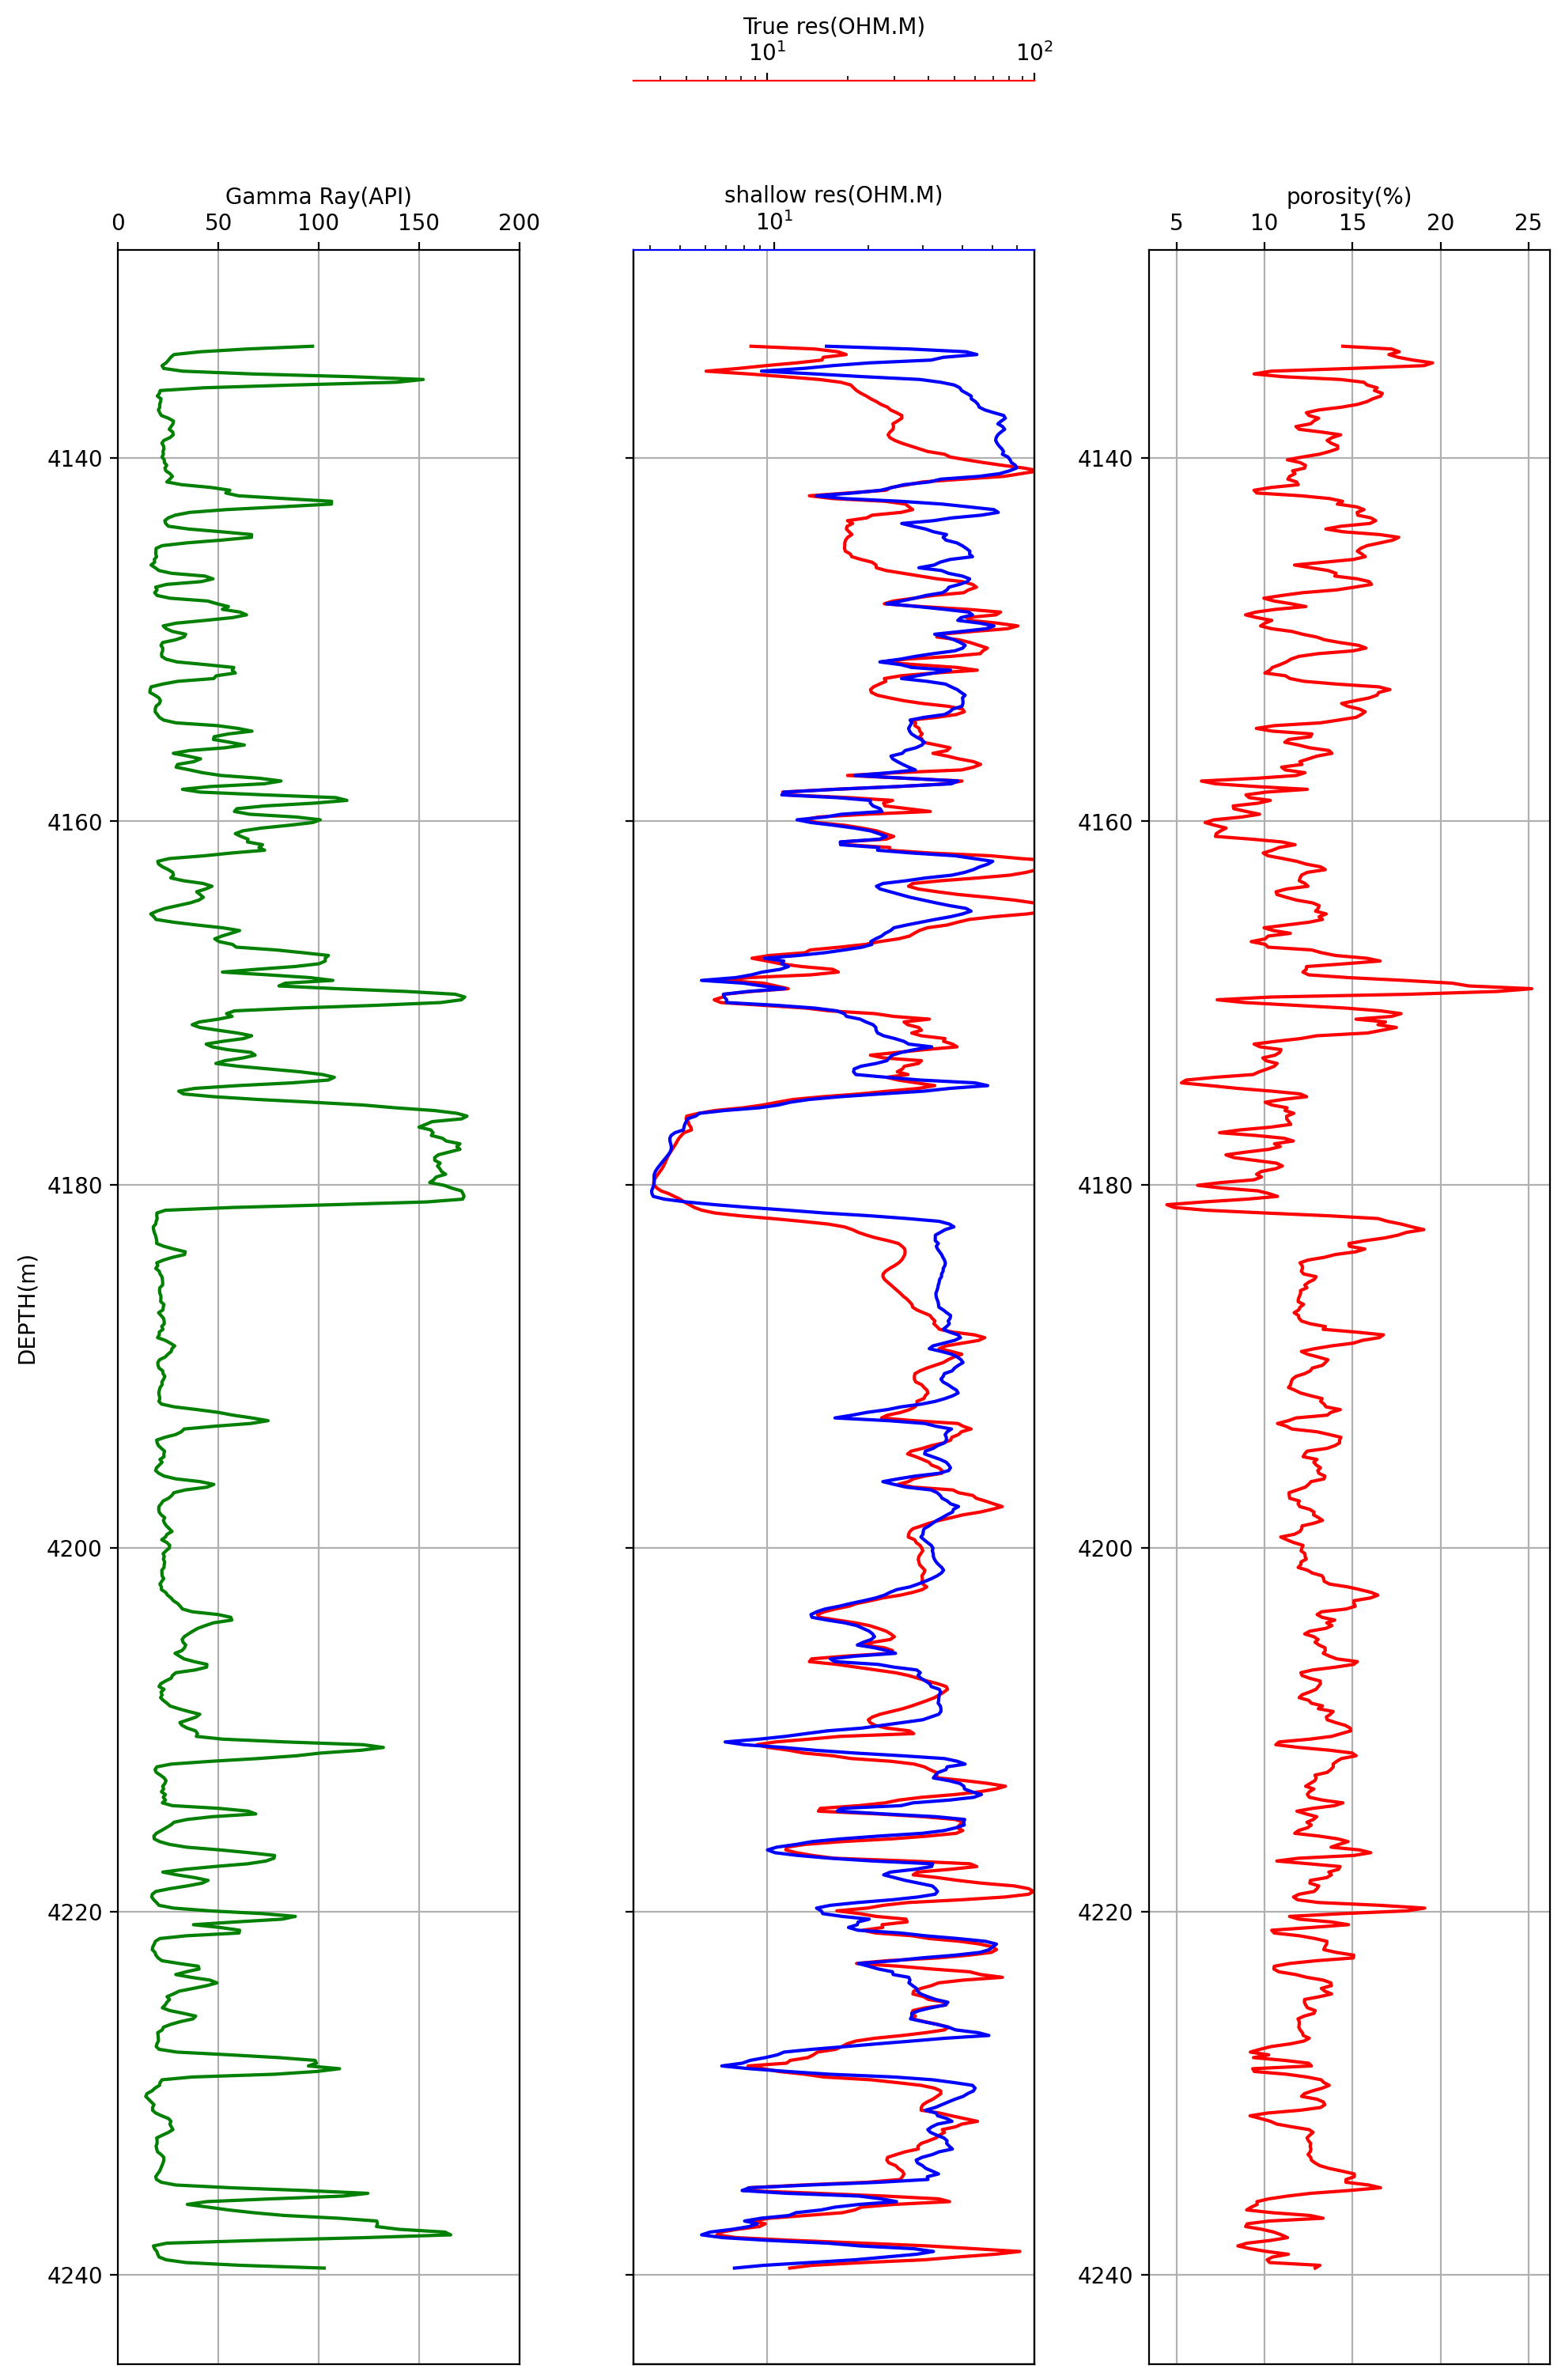

In [112]:
fig, axes = plt.subplots(figsize=(10,15),dpi=200)
ax1 = plt.subplot2grid((1,3), (0,0))
ax1.plot("GR", "DEPTH", data = data1, color = "green")
ax1.set_xlim(0, 200) 
ax1.invert_yaxis()
ax1.set_xlabel('Gamma Ray(API)')
ax1.set_ylabel('DEPTH(m)')

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.plot(data2.ATRT,data2.DEPTH ,color = "red")
ax2.semilogx()
ax2.set_xlim(0,100)
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('red')
ax2.set_xlabel('True res(OHM.M)')
ax2.grid()

ax3=ax2.twiny()
ax3.plot(data2.ATRX, data2.DEPTH, color = "blue")
ax3.semilogx()
ax2.set_xlim(0,100)
ax3.spines['top'].set_edgecolor('blue')
ax3.set_xlabel('shallow res(OHM.M)')
ax3.grid()

ax4 = plt.subplot2grid((1,3), (0,2))
ax4.plot(phi_t*100, data2["DEPTH"], color = "red")
ax4.set_xlabel('porosity(%)')
ax4.invert_yaxis()



for i, ax in enumerate(fig.axes):
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
    
    if i == 1:
        ax.spines["top"].set_position(("axes", 1.08))
    else: 
        ax.grid(axis='both')
        
for ax in [ax2, ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
  

plt.tight_layout()

In [29]:
import plotly.subplots as sp
import plotly.graph_objects as go

phiB = data2['DPHI']
phiN = data2['APSC']
phiT = (phiB  + phiN )/2

fig = sp.make_subplots(rows=1, cols=3, shared_yaxes=True, horizontal_spacing=0.03)

fig.add_trace(go.Scatter(x=phiT, y=data2.DEPTH, line=dict(width=0.5, color='blue'), name='Total Porosity'), row=1, col=1)
fig.update_xaxes(title='Total Porosity', range=[0, 1], row=1, col=1)
fig.update_yaxes(title='Depth (m)', autorange='reversed', row=1, col=1)

fig.add_trace(go.Scatter(x=data1.GR, y=data2.DEPTH, line=dict(width=0.5, color='green'), name='Gamma Ray(API)'), row=1, col=2)
fig.update_xaxes(title='Gamma Ray(API)', row=1, col=2)

fig.add_trace(go.Scatter(x=data2.RT, y=data2.DEPTH, line=dict(width=0.5, color='blue'), name='Deep Resistivity'), row=1, col=3)
fig.add_trace(go.Scatter(x=data2.ATRX, y=data2.DEPTH, line=dict(width=0.5, color='red'), name='Shallow Resistivity', showlegend=False), row=1, col=3)
fig.update_xaxes(title='Deep and Shallow Resistivity', type='log', range=[0, 2], row=1, col=3)

fig.update_layout(height=1000, width=500, title_text='Logs to determine the Sw', showlegend=False)

fig.show()

In [30]:
#fig1=px.line(data2,x='DEPTH',y='RT',range_x=[4133,4239])
#fig2=px.line(data2,x='ATRX',y='DEPTH',range_x=[4133,4239])
#fig1.show()
#fig2.show()
#fig.update_xaxes(rangeslider_visible=True

In [31]:
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

In [32]:
print(phi_t)

229    0.12885
230    0.13150
231    0.10295
232    0.10155
233    0.10460
        ...   
919    0.17600
920    0.17070
921    0.17660
922    0.17230
923    0.14455
Length: 695, dtype: float64


## calculation 0f water saturation

In [33]:
data2['phi_t'] = pd.Series(phi_t)
data3=data2[(data2.DEPTH>=4202)&(data2.DEPTH<=4203.5)]

In [34]:
p15 = data1['GR'].quantile(0.05)
p195 = data1['GR'].quantile(0.95)
Igr=(data1['GR']-p15)/(p195-p15) #volume of shale
V_sh=1.7-(3.38-(Igr+0.7)**2)**(1/2)
V_sh

3429    0.412705
3430    0.162900
3431    0.050016
3432    0.016751
3433    0.005884
          ...   
4119    0.024257
4120    0.029646
4121    0.076628
4122    0.179182
4123    0.371070
Name: GR, Length: 695, dtype: float64

In [36]:
Rt=data3['ATRX'].mean()
Rt

20.03232

In [37]:
phi=data3['phi_t'].mean()

In [38]:
Rw=Rt*(phi)**2
print(Rw)


0.4622787992665919


## archie's law

In [39]:
import numpy as np
Sw=np.sqrt(Rw/((phi_t)**2*data2.ATRT))
Sw

229    1.513689
230    1.346862
231    1.383579
232    1.075223
233    0.905687
         ...   
919    0.959184
920    0.896219
921    0.897618
922    1.015291
923    1.593767
Length: 695, dtype: float64

Text(0, 0.5, 'Depth')

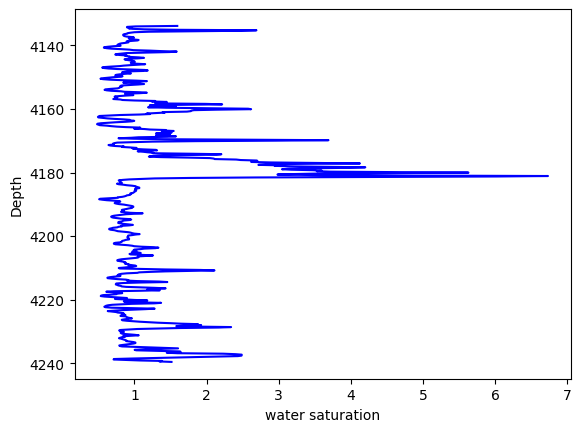

In [114]:
plt.plot(Sw,data2.DEPTH,color='blue')
plt.gca().invert_yaxis()
plt.xlabel('water saturation')
plt.ylabel('Depth')

## flagging 0f reservoir zone

In [40]:
vsh=np.array(V_sh)
sw= np.array(Sw)
phi_t = np.array(phi_t)


In [41]:
res_flag = []
for i in range(len(data2['DEPTH'])):
    if vsh[i] <= 0.4 and sw[i]<=0.7:
        res_flag.append(1)
    else:
        res_flag.append(0)
        

        

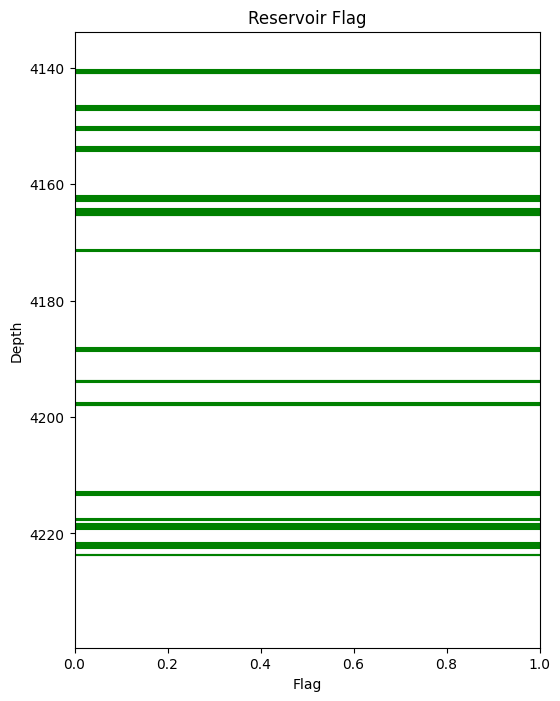

In [115]:


# Create a new figure and set its size
fig = plt.figure(figsize=(6, 8))

# Iterate over each row in the DataFrame
for i in range(len(data2['DEPTH'])):
    # Check if the condition is satisfied at this depth
    if (vsh[i] <= 0.4) and (sw[i] <= 0.7):
        # If the condition is satisfied, plot a line from x=0 to x=1 at this depth
        plt.plot([0, 1], [data2['DEPTH'].iloc[i], data2['DEPTH'].iloc[i]], color='green')
        
# Set the y-axis limits to be the same as the depth range in the DataFrame
plt.ylim(data2['DEPTH'].max(), data2['DEPTH'].min())

# Set the x-axis limits to be 0 to 1
plt.xlim(0, 1)

# Label the axes
plt.xlabel('Flag')
plt.ylabel('Depth')
plt.title('Reservoir Flag')

# Show the plot
plt.show()

## claculation std deviation ,max,mean

In [43]:
vol_sh = []
wat_sat = []
tot_por = []
for i in range(len(res_flag)):
    if res_flag[i] == 1:
        vol_sh.append(vsh[i])
        wat_sat.append(sw[i])
        tot_por.append(phi_t[i])
df_report = pd.DataFrame(zip(vol_sh,wat_sat,tot_por),columns = ['Volume of Shale','Water of Saturation','Total Porosity'])        

In [44]:
df_report

Volume of Shale  Water of Saturation  Total Porosity
0          0.095797             0.692693         0.13340
1          0.059757             0.630019         0.12400
2          0.004376             0.685259         0.15050
3          0.001009             0.598594         0.15075
4         -0.000298             0.582294         0.14070
..              ...                  ...             ...
65         0.027032             0.679352         0.11430
66         0.023154             0.614227         0.11735
67         0.016415             0.575914         0.11600
68         0.014962             0.579115         0.12285
69         0.017825             0.633441         0.12330

[70 rows x 3 columns]

In [45]:
df_report['Volume of Shale'].std()

0.029172515852262142

In [46]:
df_report.describe()

Volume of Shale  Water of Saturation  Total Porosity
count        70.000000            70.000000       70.000000
mean          0.021158             0.607889        0.136925
std           0.029173             0.061756        0.015121
min          -0.006546             0.481996        0.110450
25%           0.002466             0.565666        0.125537
50%           0.011295             0.617559        0.133550
75%           0.023477             0.662372        0.150475
max           0.112805             0.692693        0.174950